In [191]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import requests
import random
from geopy import geocoders
from geopy.geocoders import Nominatim
import time
import datetime
import seaborn as sns
import json
import hvplot.pandas

# Import API key
from API_keys import geoapify_key

In [192]:
# Save the path to the data as a variable
data_file = Path("marketing_campaign_.csv")


In [193]:
# Use Pandas to read data
customer_data_file_df = pd.read_csv(data_file)
customer_data_file_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [194]:
customer_data_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [195]:
customer_data_file_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [196]:
#Created a feature "Customer_For" Fixed
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta.days)

customer_data_file_df["Customer_For"] = days
customer_data_file_df["Customer_For"] = pd.to_numeric(customer_data_file_df["Customer_For"], errors="coerce")
customer_data_file_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,0,0,0,0,0,0,3,11,0,321


In [197]:
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [198]:
#To remove the NA values
customer_data_file_df = customer_data_file_df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(customer_data_file_df))
customer_data_file_df.info()

The total number of data-points after removing the rows with missing values are: 2216
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  Mn

In [199]:
# Adding a column for Age of customer 
customer_data_file_df["Age"] = 2021- customer_data_file_df["Year_Birth"]


In [200]:
# Adding a column for Total spendings across the items
customer_data_file_df["Spent"] = customer_data_file_df["MntWines"]+ customer_data_file_df["MntFruits"]+ customer_data_file_df["MntMeatProducts"]+ customer_data_file_df["MntFishProducts"]+ customer_data_file_df["MntSweetProducts"]+ customer_data_file_df["MntGoldProds"]

In [201]:
# Adding a column Deriving living situation by marital status "Alone"
customer_data_file_df["Living_With"]= customer_data_file_df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [202]:
#This code creates a new column called Total Purcharses it adds NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
customer_data_file_df['TotalPurchases'] = customer_data_file_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
customer_data_file_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,TotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,0,0,3,11,1,971,64,1617,Alone,25
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,0,0,3,11,0,125,67,27,Alone,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,0,0,3,11,0,472,56,776,Partner,21
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,0,3,11,0,65,37,53,Partner,8
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,0,0,3,11,0,321,40,422,Partner,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/6/2013,46,709,...,0,0,3,11,0,541,54,1341,Partner,18
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,0,0,3,11,0,61,75,444,Partner,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/1/2014,91,908,...,0,0,3,11,0,315,40,1241,Alone,19
2238,8235,1956,Master,Together,69245.0,0,1,24/1/2014,8,428,...,0,0,3,11,0,316,65,843,Partner,23


In [203]:
customer_data_file_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,TotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,0,0,3,11,1,971,64,1617,Alone,25
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,0,0,3,11,0,125,67,27,Alone,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,0,0,3,11,0,472,56,776,Partner,21
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,0,3,11,0,65,37,53,Partner,8
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,0,0,3,11,0,321,40,422,Partner,19


In [204]:
#Feature indicating total children living in the household
customer_data_file_df["Children"]= customer_data_file_df["Kidhome"]+customer_data_file_df["Teenhome"]
customer_data_file_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,TotalPurchases,Children
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,0,3,11,1,971,64,1617,Alone,25,0
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,0,3,11,0,125,67,27,Alone,6,2
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,0,3,11,0,472,56,776,Partner,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,3,11,0,65,37,53,Partner,8,1
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,0,3,11,0,321,40,422,Partner,19,1


In [205]:
#Feature for total members in the household
customer_data_file_df["Family_Size"] = customer_data_file_df["Living_With"].replace({"Alone": 1, "Partner":2})+ customer_data_file_df["Children"]

In [206]:
#Feature pertaining parenthood
customer_data_file_df["Is_Parent"] = np.where(customer_data_file_df.Children> 0, 1, 0)

In [207]:
#Segmenting education levels in three groups
customer_data_file_df["Education"]=customer_data_file_df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [208]:
# formatting the 'mnt' columns for clarity
customer_data_file_df=customer_data_file_df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [209]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
customer_data_file_df = customer_data_file_df.drop(to_drop, axis=1)

In [210]:
# capping the age at 90 and income at 600k to reduce significant outliers and skewing data
customer_data_file_df = customer_data_file_df[(customer_data_file_df["Age"]<90)]
customer_data_file_df = customer_data_file_df[(customer_data_file_df["Income"]<600000)]

In [211]:
# Create a new column 'Living_With_Descendants' based on the values in 'Is_Parent'
customer_data_file_df['Living_With_Descendants'] = customer_data_file_df['Is_Parent'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [212]:
customer_data_file_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Customer_For,Age,Spent,Living_With,TotalPurchases,Children,Family_Size,Is_Parent,Living_With_Descendants
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1,971,64,1617,Alone,25,0,1,0,No
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,125,67,27,Alone,6,2,3,1,Yes
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,472,56,776,Partner,21,0,2,0,No
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,65,37,53,Partner,8,1,3,1,Yes
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,321,40,422,Partner,19,1,3,1,Yes


In [213]:
customer_data_file_df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,TotalPurchases,Children,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.013562,0.009042,0.150542,512.144213,52.086347,607.268083,14.891501,0.947559,2.593128,0.714286
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.115691,0.094678,0.357683,232.551465,11.701599,602.513364,7.671629,0.749466,0.906236,0.451856
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,340.000000,44.000000,69.000000,8.000000,0.000000,2.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,513.000000,51.000000,397.000000,15.000000,1.000000,3.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,686.000000,62.000000,1048.000000,21.000000,1.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1063.000000,81.000000,2525.000000,44.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

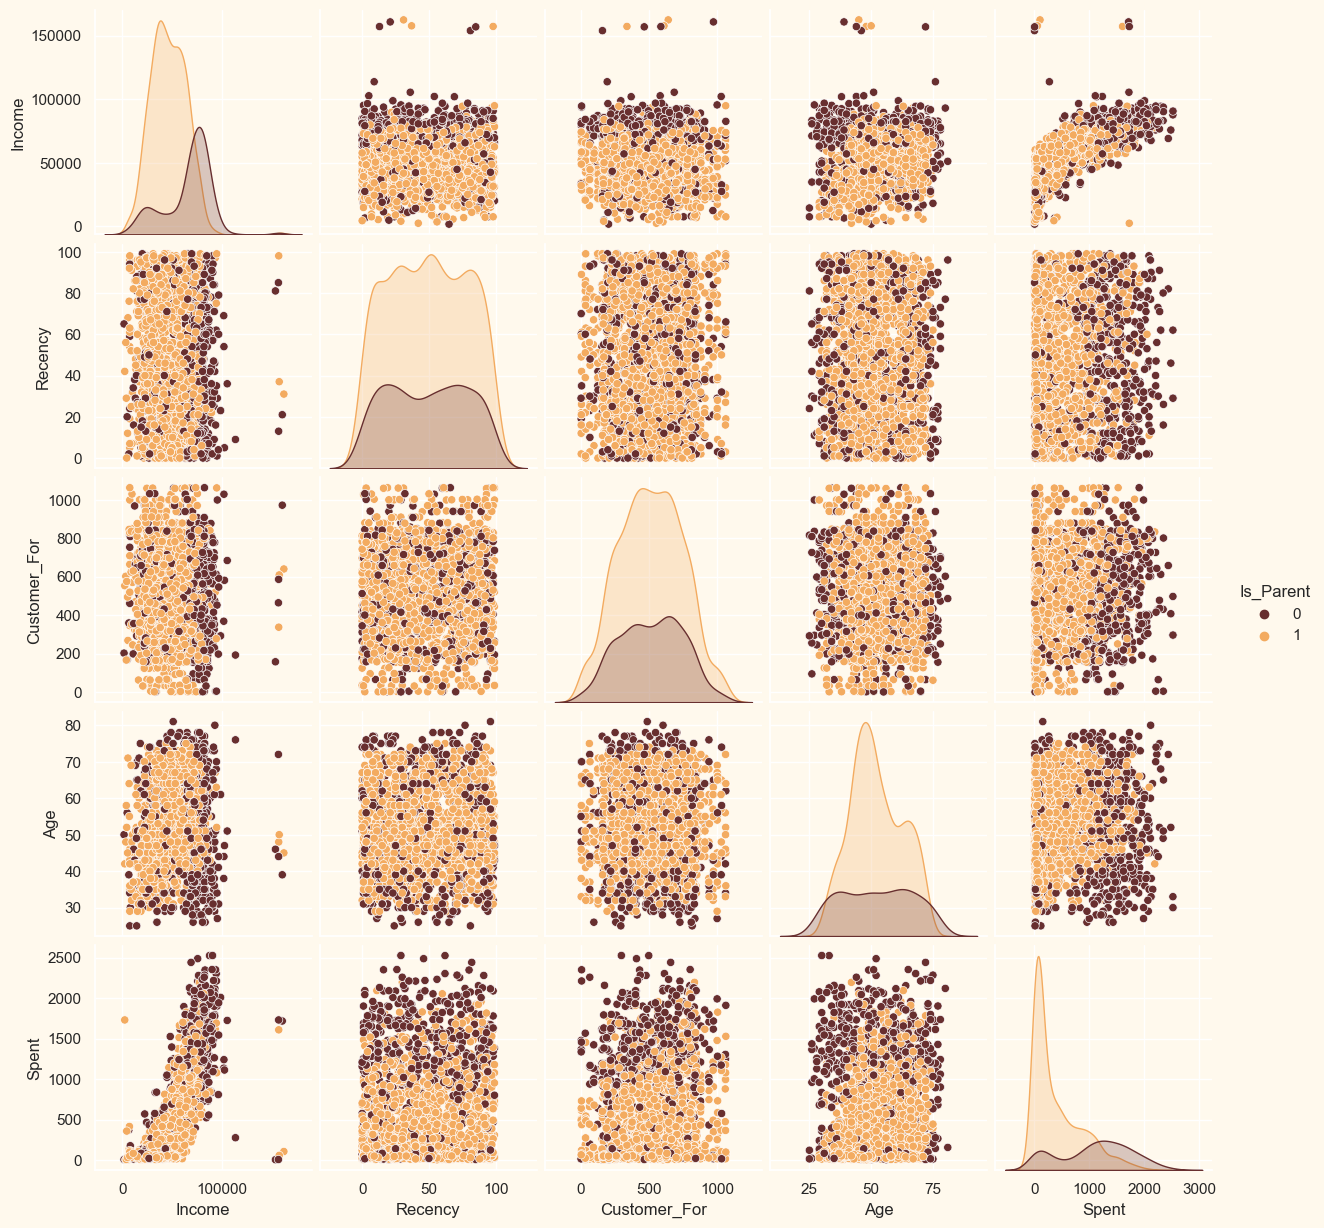

<AxesSubplot:>

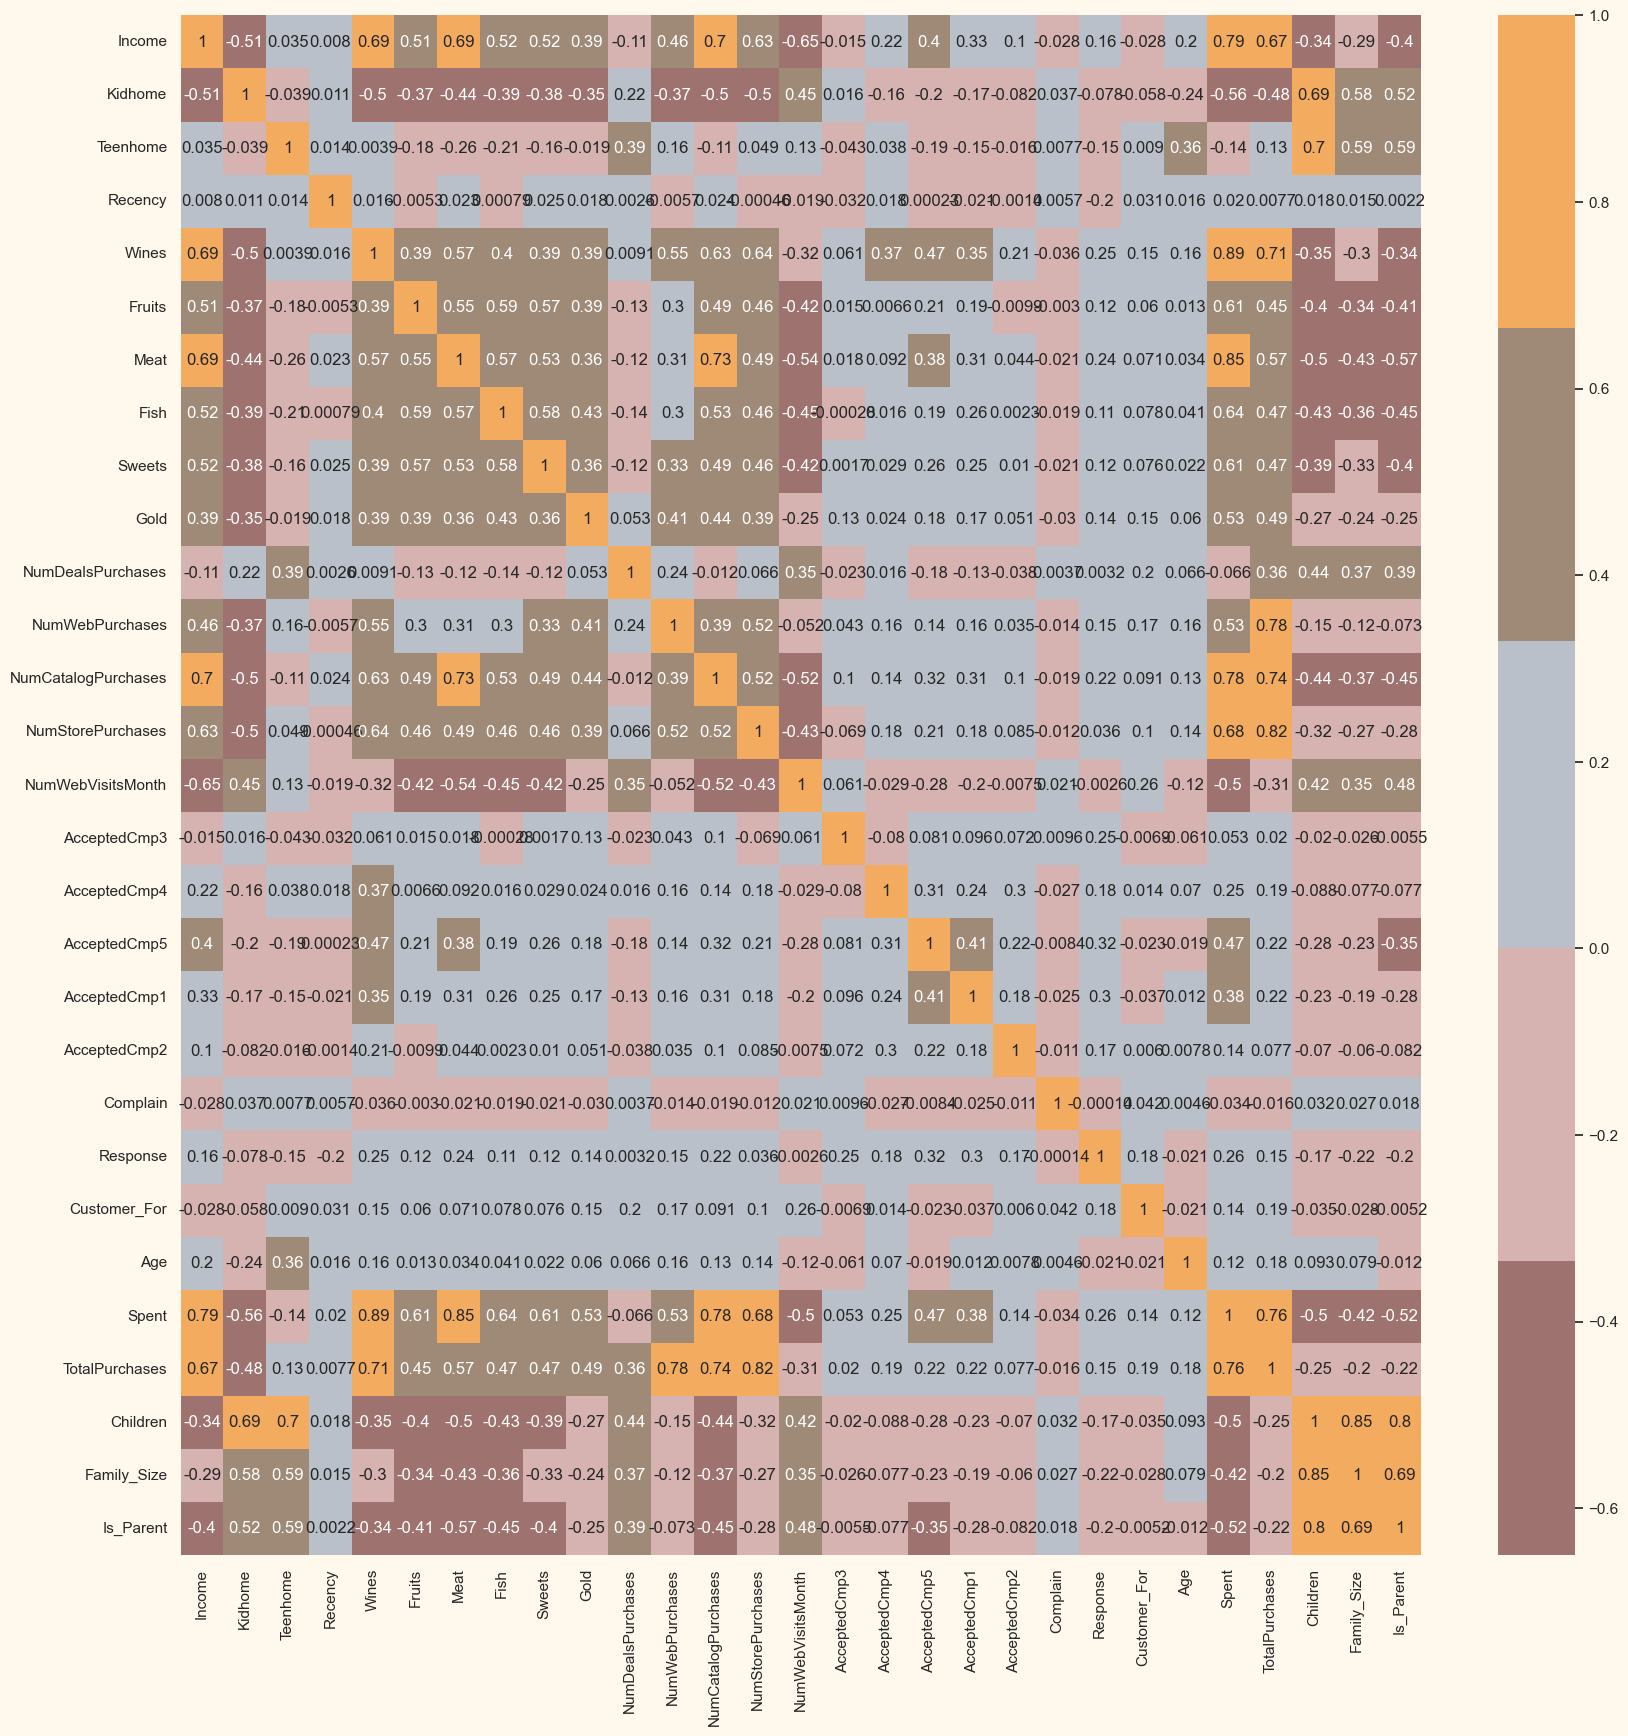

In [214]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(customer_data_file_df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()
#correlation matrix
corrmat= customer_data_file_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [215]:
# Export file as a CSV, without the Pandas index, but with the header
customer_data_file_df.to_csv("customer.csv", index=False, header=True)